<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-05-07 13:31:29
-------------------
qualified stocks: 97
with latest results: 90
still star stocks: 48
-------------------
Initial Investment:  1.14 C
CY Investment:  1.41 C
Reserve:  2.11 L
Current:  1.23 C
-------------------
Today PnL: 54.10 K (0.44%)
Current PnL: -21.58 L (-15.3%)
CY Booked + Current PnL: -19.57 L (-13.88%)
-------------------
Total profit:  3.73 L
Total loss:  -25.31 L
-------------------
Total Booked + Current PnL: 7.41 L (6.5%)
Total Booked PnL: 28.99 L (25.42%)
Curr Year Booked PnL: 2.01 L (1.63%)
Prev Year Booked PnL: 26.98 L (23.66%)
Est FTT:  2.06 C
Est FTT PnL: 82.46 L (66.94%)
-------------------
Est LTT:  2.67 C
Est LTT PnL: 1.44 C (116.57%)
Deployed:  1.14 C
Current:  1.23 C
CAGR/XIRR %: 5.61%


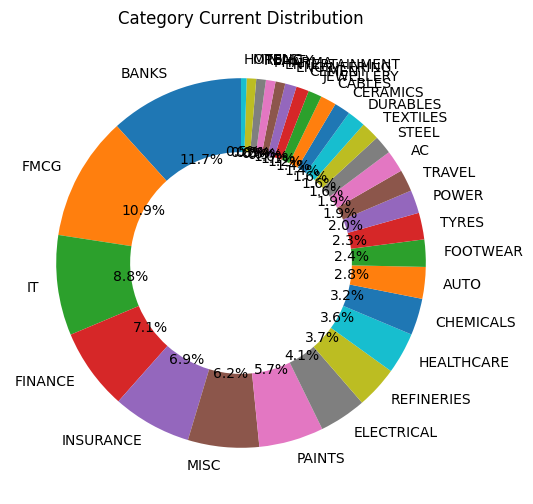

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Strategy','Category']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
34,HDFCBANK,1561.04,2170.00,3.67,X-LC,73.71,102449.0,19714.0,12560.0,0.07,...,12.26,39.01,4.0,186.0,1.57,0.85,35.36,X40,BTT,BANKS
73,SBILIFE,1496.49,1924.99,-1.16,H-LC,90.72,146756.0,21051.0,14940.0,1.22,...,10.18,28.63,NaN,152.0,1.41,1.21,30.74,AR,ATH,INSURANCE
60,PIDILITIND,2504.06,3576.00,-14.47,X-LC,40.21,89280.0,14158.0,17999.0,-0.95,...,20.16,42.81,10.0,57.0,0.79,0.74,11.97,X40,BTT,CHEMICALS
55,MRF,113820.50,150504.12,23.07,X-MC,98.97,282480.0,54839.0,18531.0,4.63,...,6.56,32.23,NaN,214.0,2.96,2.33,37.58,AR,ATH,TYRES
35,HDFCLIFE,562.05,897.00,-5.12,H-LC,63.92,90375.0,20119.0,21753.0,0.06,...,24.07,59.59,16.0,188.0,0.92,0.75,35.74,X40,BTT,INSURANCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,RBLBANK,230.61,388.00,31.28,M-SC,87.63,203932.0,-30368.0,190269.0,1.79,...,93.30,68.25,-48.0,216.0,-0.16,1.68,34.30,XY24,NTT,BANKS
69,SAIL,130.64,228.00,72.98,M-MC,68.04,196325.0,-28637.0,196286.0,2.19,...,99.98,74.53,-18.0,211.0,-0.15,1.62,13.99,XY24,BTT,STEEL
67,REPCOHOME,515.07,880.00,-59.76,H-SC,71.13,148534.0,-56464.0,201709.0,-0.80,...,135.80,70.85,-44.0,122.0,-0.28,1.23,19.90,XY24,NTT,FINANCE
11,BANDHANBNK,214.25,400.00,-38.37,H-SC,69.07,183848.0,-64682.0,280148.0,0.66,...,152.38,86.70,-29.0,24.0,-0.23,1.52,21.63,XY24,NTT,BANKS


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
0,5PAISA,564.75,810.00,118.75,H-SC,22.68,118068.0,-68864.0,150041.0,-0.92,...,127.08,43.43,20.0,146.0,-0.46,0.98,12.95,X40N,BTT,FINANCE
2,ABB,5319.37,8953.12,-40.16,H-LC,75.26,135712.0,2728.0,88118.0,1.77,...,64.93,68.31,NaN,4.0,0.03,1.12,10.66,AR,ATH,ELECTRICAL
4,ADANIPORTS,1103.69,1583.00,3.60,M-LC,93.81,182731.0,31525.0,34134.0,0.98,...,18.68,43.43,NaN,81.0,0.92,1.51,26.66,XY24,NTT,MISC
5,ALKYLAMINE,2347.98,4567.52,-18.14,X-SC,37.63,73057.0,-27906.0,123349.0,0.18,...,168.84,94.53,-59.0,49.0,-0.23,0.60,8.31,SR,ATH,CHEMICALS
6,ANGELONE,2328.67,3033.00,-6.93,H-SC,72.16,152288.0,924.0,44849.0,1.90,...,29.45,30.25,77.0,115.0,0.02,1.26,20.53,X40N,NTT,FINANCE
7,ASIANPAINT,2961.56,4250.00,-29.53,X-LC,20.62,161656.0,-39730.0,127336.0,-1.68,...,78.77,43.51,-18.0,59.0,-0.31,1.34,11.50,X40,BTT,PAINTS
12,BANKINDIA,113.49,190.00,-28.40,M-MC,36.08,125032.0,-4120.0,91186.0,0.73,...,72.93,67.42,-12.0,74.0,-0.05,1.03,21.60,XR,NTT,BANKS
13,BATAINDIA,1550.24,2096.00,-33.36,M-SC,23.71,100173.0,-28497.0,73797.0,-0.01,...,73.67,35.20,-8.0,42.0,-0.39,0.83,2.20,X40,NTT,FOOTWEAR
14,BERGEPAINT,558.54,680.00,-19.11,H-MC,53.61,173605.0,-3452.0,41960.0,0.81,...,24.17,21.75,-14.0,149.0,-0.08,1.43,24.18,XY24,NTT,PAINTS
15,BRITANNIA,4902.95,6446.05,8.37,X-LC,48.45,214000.0,17882.0,43849.0,-0.81,...,20.49,31.47,239.0,129.0,0.41,1.77,16.93,AR,ATH,FMCG


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
3,ACC,2579.05,3906.0,-37.64,M-MC,5.15,134444.0,-53827.0,150698.0,-0.39,...,112.09,51.45,-37.0,51.0,-0.36,1.11,1.27,XY24,BTT,CEMENT
4,ADANIPORTS,1103.69,1583.0,3.60,M-LC,93.81,182731.0,31525.0,34134.0,0.98,...,18.68,43.43,NaN,81.0,0.92,1.51,26.66,XY24,NTT,MISC
9,ATULAUTO,624.44,844.0,3332.43,M-SC,12.37,106979.0,-40389.0,92205.0,-0.30,...,86.19,35.16,-49.0,160.0,-0.44,0.88,9.27,XY24,NTT,AUTO
10,AWL,361.39,485.0,-69.33,H-MC,9.28,135188.0,-50928.0,114585.0,1.55,...,84.76,34.20,-36.0,3.0,-0.44,1.12,11.35,XY24,NTT,FMCG
11,BANDHANBNK,214.25,400.0,-38.37,H-SC,69.07,183848.0,-64682.0,280148.0,0.66,...,152.38,86.70,-29.0,24.0,-0.23,1.52,21.63,XY24,NTT,BANKS
14,BERGEPAINT,558.54,680.0,-19.11,H-MC,53.61,173605.0,-3452.0,41960.0,0.81,...,24.17,21.75,-14.0,149.0,-0.08,1.43,24.18,XY24,NTT,PAINTS
17,CAMPUS,294.86,393.0,NaN,NaN,28.87,136805.0,-30970.0,86816.0,-1.31,...,63.46,33.28,-16.0,NaN,-0.36,1.13,5.92,XY24,NTT,FOOTWEAR
22,DABUR,505.20,735.0,-14.38,X-MC,54.64,188682.0,-8346.0,97964.0,0.67,...,51.92,45.49,1.0,80.0,-0.09,1.56,7.18,XY24,BTT,FMCG
26,EASEMYTRIP,18.12,26.4,21.08,M-SC,26.80,116608.0,-60207.0,141002.0,-1.65,...,120.92,45.70,-91.0,10.0,-0.43,0.96,8.24,XY24,NTT,TRAVEL
28,GICRE,340.22,583.0,2.32,H-MC,58.76,97075.0,17464.0,39344.0,1.55,...,40.53,71.36,109.0,182.0,0.44,0.80,32.58,XY24,BTT,INSURANCE


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
1,AARTIIND,487.04,919.00,20.56,M-SC,100.00,76152.0,-5184.0,77325.0,4.76,...,101.54,88.69,-8.0,155.0,-0.07,0.63,28.41,XR,NTT,CHEMICALS
2,ABB,5319.37,8953.12,-40.16,H-LC,75.26,135712.0,2728.0,88118.0,1.77,...,64.93,68.31,NaN,4.0,0.03,1.12,10.66,AR,ATH,ELECTRICAL
5,ALKYLAMINE,2347.98,4567.52,-18.14,X-SC,37.63,73057.0,-27906.0,123349.0,0.18,...,168.84,94.53,-59.0,49.0,-0.23,0.60,8.31,SR,ATH,CHEMICALS
8,ASIANTILES,75.41,137.00,4777.78,M-SC,29.90,53529.0,-40281.0,116897.0,-0.74,...,218.38,81.67,-16.0,127.0,-0.34,0.44,3.66,XR,NTT,CERAMICS
12,BANKINDIA,113.49,190.00,-28.40,M-MC,36.08,125032.0,-4120.0,91186.0,0.73,...,72.93,67.42,-12.0,74.0,-0.05,1.03,21.60,XR,NTT,BANKS
15,BRITANNIA,4902.95,6446.05,8.37,X-LC,48.45,214000.0,17882.0,43849.0,-0.81,...,20.49,31.47,239.0,129.0,0.41,1.77,16.93,AR,ATH,FMCG
16,BSOFT,628.85,844.81,-27.58,M-SC,79.38,68075.0,-41974.0,79763.0,1.22,...,117.17,34.34,-28.0,39.0,-0.53,0.56,12.07,XR,ATH,IT
18,CAMS,3643.00,5250.99,-7.66,H-SC,30.93,102102.0,98.0,44925.0,1.07,...,44.00,44.14,261.0,14.0,0.00,0.84,19.46,XR,ATH,MISC
20,COFFEEDAY,59.14,80.00,-59.76,L-SC,60.82,59021.0,-54528.0,94581.0,-2.01,...,160.25,35.27,NaN,159.0,-0.58,0.49,44.45,XR,NTT,HOTELS
23,DEN,52.79,75.00,78.76,L-SC,51.55,50240.0,-34224.0,69758.0,-0.92,...,138.85,42.07,-21.0,130.0,-0.49,0.41,6.69,AR,NTT,ENTERTAINMENT


In [8]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.91
1,20,34.93
2,30,47.37


In [9]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,35.35
X40,14.88
X40N,13.47
AR,12.82
XY25,11.07
XR,10.09
X200,1.13
SR,1.12


In [10]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,20.48
X-LC,19.11
M-SC,15.67
X-MC,8.02
M-LC,7.83
M-MC,7.45
H-MC,7.05
H-LC,6.18
X-SC,2.50


In [11]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          8.34
X40       X-LC          7.71
XY25      X-LC          7.10
XY24      M-SC          6.53
X40N      H-SC          5.83
XY24      M-LC          4.90
          M-MC          4.86
X40N      M-SC          3.61
XY24      H-MC          3.35
AR        H-LC          3.17
          X-LC          3.17
XY24      X-MC          3.07
XR        H-SC          2.97
          M-SC          2.75
AR        X-MC          2.33
X40       H-SC          1.96
          M-SC          1.75
XY25      M-LC          1.69
X40       H-LC          1.56
X40N      X-MC          1.53
XY25      H-LC          1.45
AR        H-SC          1.38
X40N      H-MC          1.38
XR        M-LC          1.24
X200      X-LC          1.13
X40N      X-SC          1.12
AR        H-MC          1.12
X40       X-MC          1.09
XR        M-MC          1.03
          L-SC          0.93
XY24      L-SC          0.85
XY25      M-MC          0.83
X40       H-MC          0.81
XR        X-SC          0.78
AR        M-MC          0.73
SR        X-SC          0.60
          M-SC          0.52
AR        M-SC          0.51
          L-SC          0.41
XR        H-MC          0.39
Name: CurrAlloc%, dtype: float64

In [12]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,11.72,-11.96,66.29
FMCG,10.86,-2.71,34.16
IT,8.75,-28.43,95.67
FINANCE,7.12,-28.47,86.45
INSURANCE,6.90,-1.71,38.80
MISC,6.21,-36.82,86.32
PAINTS,5.66,-20.06,55.60
ELECTRICAL,4.11,-11.48,68.29
REFINERIES,3.69,8.98,7.80


In [13]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,70.61,8554446.0,-12.69,-1085451.0,57.59,4926137.0


In [14]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,65.61,7947838.0,-8.25,-655992.0,48.47,3852495.0


In [15]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3280627.0
XR,1320931.0
X40N,1268667.0
AR,1091831.0
X40,800403.0
SR,208594.0
XY25,194873.0
X200,80509.0


In [16]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,2369895.0
M-SC,2021010.0
X-LC,782977.0
M-MC,687606.0
H-MC,404588.0
X-SC,373283.0
M-LC,367584.0
X-MC,334213.0
L-SC,332612.0


In [17]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          981321.0
          M-SC          822899.0
X40N      H-SC          591660.0
XY24      M-MC          484352.0
XR        M-SC          452558.0
X40       X-LC          405303.0
X40N      M-SC          398270.0
AR        H-SC          393417.0
XR        H-SC          313912.0
XY24      M-LC          234073.0
          H-MC          195889.0
AR        X-LC          195439.0
X40       M-SC          167137.0
XR        L-SC          166981.0
AR        H-LC          156439.0
XY24      X-MC          141093.0
XR        X-SC          131256.0
SR        X-SC          123349.0
X40N      X-SC          118678.0
          X-MC          115588.0
XR        M-LC          109795.0
XY25      X-LC          101726.0
XY24      L-SC           95873.0
AR        M-SC           94901.0
XR        M-MC           91186.0
X40       H-SC           89585.0
AR        M-MC           87194.0
SR        M-SC           85245.0
X200      X-LC           80509.0
AR        H-MC           76152.0
          L-SC           69758.0
X40       X-MC           59001.0
XR        H-MC           55243.0
X40       H-LC           46544.0
XY25      H-LC           44557.0
X40N      H-MC           44471.0
X40       H-MC           32833.0
XY25      M-MC           24874.0
          M-LC           23716.0
AR        X-MC           18531.0
Name: FTT Amt, dtype: float64

In [18]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
H-SC,21
M-SC,20
X-LC,13
M-MC,7
H-MC,7
H-LC,6
X-MC,6
M-LC,6
X-SC,4
